<a href="https://colab.research.google.com/github/priyadharshinishab/keywordextraction/blob/main/frozen_lake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install gymnasium numpy matplotlib


Training completed.



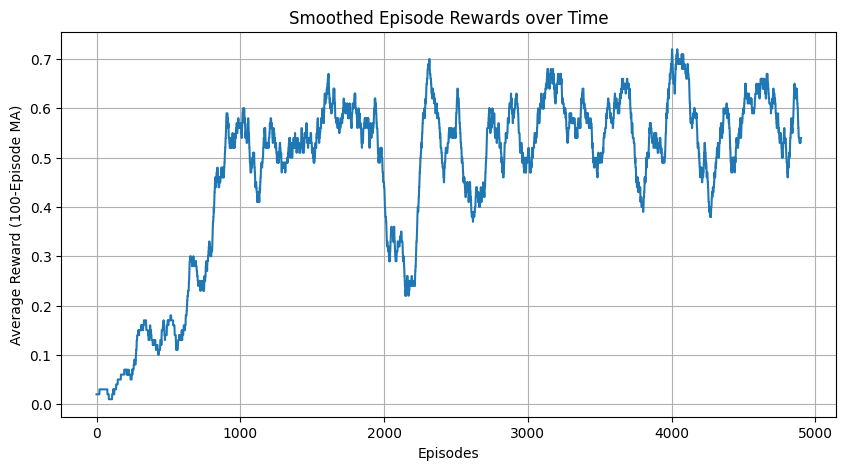

Average reward over last 500 episodes: 0.576

Test Episode 1

Test Episode 2

Test Episode 3


In [3]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create the environment (you can set is_slippery=False to make it easier)
env = gym.make("FrozenLake-v1", is_slippery=True)

# Q-table initialization
state_size = env.observation_space.n
action_size = env.action_space.n
q_table = np.zeros((state_size, action_size))

# Hyperparameters
total_episodes = 5000
learning_rate = 0.8
discount_rate = 0.95
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.005

# Track rewards
rewards = []

# Q-learning algorithm
for episode in range(total_episodes):
    state, _ = env.reset()
    done = False
    total_rewards = 0

    while not done:
        # Exploration-exploitation trade-off
        if np.random.rand() > epsilon:
            action = np.argmax(q_table[state, :])
        else:
            action = env.action_space.sample()

        new_state, reward, done, truncated, info = env.step(action)

        # Q-table update
        q_table[state, action] += learning_rate * (
            reward + discount_rate * np.max(q_table[new_state, :]) - q_table[state, action])

        total_rewards += reward
        state = new_state

    # Reduce epsilon (exploration rate)
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    rewards.append(total_rewards)

print("Training completed.\n")

# ----- Moving average for smoother graph -----
def moving_average(data, window_size=100):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Plot rewards
smoothed_rewards = moving_average(rewards)
plt.figure(figsize=(10, 5))
plt.plot(smoothed_rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward (100-Episode MA)')
plt.title('Smoothed Episode Rewards over Time')
plt.grid(True)
plt.show()

# Print average of last N episodes
print("Average reward over last 500 episodes:", np.mean(rewards[-500:]))

# ----- Test the agent -----
test_env = gym.make("FrozenLake-v1", render_mode="human", is_slippery=True)

for episode in range(3):
    state, _ = test_env.reset()
    done = False
    print(f"\nTest Episode {episode + 1}")
    while not done:
        action = np.argmax(q_table[state, :])
        state, reward, done, truncated, info = test_env.step(action)
